This notebook clean and transform KLD Compustat.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('KLD_Compustat.csv')
data.shape

/Users/shinggg/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (184,200,204) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(43331, 1122)

In [3]:
print(data.columns.to_list())

['ticker_KLD', 'cusip_KLD', 'companyname', 'year', 'date', 'permno', 'gvkey', 'datadate_x', 'fyear', 'cusip_x', 'ticker', 'companyid', 'env_str_a', 'env_str_b', 'env_str_c', 'env_str_d', 'env_str_f', 'env_str_x', 'env_str_num', 'env_con_a', 'env_con_b', 'env_con_c', 'env_con_d', 'env_con_e', 'env_con_x', 'env_con_num', 'com_str_a', 'com_str_b', 'com_str_c', 'com_str_x', 'com_str_num', 'com_con_a', 'com_con_b', 'com_con_d', 'com_con_x', 'com_con_num', 'hum_con_a', 'hum_con_b', 'hum_con_num', 'emp_str_a', 'emp_str_b', 'emp_str_c', 'emp_str_d', 'emp_str_f', 'emp_str_x', 'emp_str_num', 'emp_con_a', 'emp_con_b', 'emp_con_c', 'emp_con_x', 'emp_con_num', 'div_str_a', 'div_str_b', 'div_str_c', 'div_str_d', 'div_str_e', 'div_str_f', 'div_str_x', 'div_str_num', 'div_con_a', 'div_con_x', 'div_con_num', 'pro_str_a', 'pro_str_b', 'pro_str_c', 'pro_str_x', 'pro_str_num', 'pro_con_a', 'pro_con_d', 'pro_con_e', 'pro_con_x', 'pro_con_num', 'cgov_str_a', 'cgov_str_c', 'cgov_str_x', 'cgov_str_num', 'cgov

In [4]:
data.sort_values(by=['gvkey', 'fyear'])

,ticker_KLD,cusip_KLD,companyname,year,date,permno,gvkey,datadate_x,fyear,cusip_x,...,prcc_f,prch_f,prcl_f,adjex_f,rank,au,auop,auopic,ceoso,cfoso
0,AIR,00036110,AAR CORPORATION,2003,2003-12-31,54594.0,1004,2004-05-31,2003.0,00036110,...,9.58,16.87,4.59,1.0,1.0,6.0,1.0,NaN,Y,Y
1,AIR,00036110,AAR CORPORATION,2004,2004-12-31,54594.0,1004,2005-05-31,2004.0,00036110,...,16.04,16.13,8.86,1.0,1.0,6.0,1.0,1.0,Y,Y
2,AIR,00036110,AAR CORPORATION,2005,2005-12-30,54594.0,1004,2006-05-31,2005.0,00036110,...,24.08,29.32,14.80,1.0,1.0,6.0,1.0,1.0,Y,Y
3,AIR,00036110,AAR CORPORATION,2006,2006-12-29,54594.0,1004,2007-05-31,2006.0,00036110,...,32.50,33.75,19.40,1.0,1.0,6.0,1.0,1.0,Y,Y
4,AIR,00036110,AAR CORPORATION,2007,2007-12-31,54594.0,1004,2008-05-31,2007.0,00036110,...,19.28,39.42,18.75,1.0,1.0,6.0,1.0,1.0,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43326,FF,36116M10,FUTUREFUEL CORP.,2015,2015-12-31,12615.0,287462,2015-12-31,2015.0,36116M10,...,13.50,16.08,9.11,1.0,1.0,9.0,1.0,1.0,Y,Y
43327,FF,36116M10,FUTUREFUEL CORP.,2016,2016-12-30,12615.0,287462,2016-12-31,2016.0,36116M10,...,13.90,16.58,9.77,1.0,1.0,9.0,1.0,1.0,Y,Y
43328,PAH,72766Q10,PLATFORM SPECIALTY PRODUCTS CORPORATION,2014,2014-12-31,14406.0,315318,2014-12-31,2014.0,72766Q10,...,23.22,28.95,13.75,1.0,1.0,6.0,1.0,0.0,Y,Y
43329,PAH,72766Q10,PLATFORM SPECIALTY PRODUCTS CORPORATION,2015,2015-12-31,14406.0,315318,2015-12-31,2015.0,72766Q10,...,12.83,28.44,9.25,1.0,1.0,7.0,4.0,2.0,Y,Y


Number of unique company based on _gvkey_ column:

In [5]:
data.gvkey.nunique()

5222

## 4. Construct Overal KLD Indices
### 4.1 Collect positive and negative performance indicator list
Column names contains "str" ("con") corresponding to positive (negative) performance indicators, respectively.

In [6]:
data.columns[data.columns.str.contains("_str_")]

Index(['env_str_a', 'env_str_b', 'env_str_c', 'env_str_d', 'env_str_f',
       'env_str_x', 'env_str_num', 'com_str_a', 'com_str_b', 'com_str_c',
       'com_str_x', 'com_str_num', 'emp_str_a', 'emp_str_b', 'emp_str_c',
       'emp_str_d', 'emp_str_f', 'emp_str_x', 'emp_str_num', 'div_str_a',
       'div_str_b', 'div_str_c', 'div_str_d', 'div_str_e', 'div_str_f',
       'div_str_x', 'div_str_num', 'pro_str_a', 'pro_str_b', 'pro_str_c',
       'pro_str_x', 'pro_str_num', 'cgov_str_a', 'cgov_str_c', 'cgov_str_x',
       'cgov_str_num', 'com_str_d', 'com_str_f', 'hum_str_a', 'hum_str_x',
       'hum_str_num', 'div_str_g', 'cgov_str_d', 'hum_str_d', 'hum_str_g',
       'emp_str_g', 'com_str_g', 'cgov_str_e', 'env_str_g', 'cgov_str_f',
       'com_str_h', 'emp_str_h', 'div_str_h', 'pro_str_d', 'env_str_h',
       'env_str_i', 'env_str_j', 'emp_str_i', 'emp_str_j', 'emp_str_k',
       'emp_str_l', 'cgov_str_g', 'cgov_str_h', 'gov_str_num', 'env_str_k',
       'env_str_l', 'env_str_m', 'env_s

In [7]:
sum(data.columns.str.contains("_str_"))

80

Column names contains "_num" represent total number of particular category indicators.

In [8]:
data.columns[data.columns.str.contains("str_num")]

Index(['env_str_num', 'com_str_num', 'emp_str_num', 'div_str_num',
       'pro_str_num', 'cgov_str_num', 'hum_str_num', 'gov_str_num'],
      dtype='object')

In [9]:
sum(data.columns.str.contains("str_num"))

8

In [10]:
data.columns[data.columns.str.contains("_con_")]

Index(['env_con_a', 'env_con_b', 'env_con_c', 'env_con_d', 'env_con_e',
       'env_con_x', 'env_con_num', 'com_con_a', 'com_con_b', 'com_con_d',
       'com_con_x', 'com_con_num', 'hum_con_a', 'hum_con_b', 'hum_con_num',
       'emp_con_a', 'emp_con_b', 'emp_con_c', 'emp_con_x', 'emp_con_num',
       'div_con_a', 'div_con_x', 'div_con_num', 'pro_con_a', 'pro_con_d',
       'pro_con_e', 'pro_con_x', 'pro_con_num', 'cgov_con_b', 'cgov_con_f',
       'cgov_con_num', 'alc_con_a', 'gam_con_a', 'mil_con_a', 'mil_con_b',
       'mil_con_c', 'mil_con_x', 'mil_con_num', 'nuc_con_a', 'nuc_con_c',
       'nuc_con_d', 'nuc_con_x', 'nuc_con_num', 'tob_con_a', 'emp_con_d',
       'cgov_con_x', 'div_con_b', 'hum_con_c', 'hum_con_d', 'hum_con_x',
       'alc_con_x', 'gam_con_x', 'alc_con_num', 'gam_con_num', 'tob_con_num',
       'hum_con_f', 'fir_con_a', 'tob_con_x', 'env_con_f', 'hum_con_g',
       'cgov_con_g', 'cgov_con_h', 'cgov_con_i', 'cgov_con_j', 'env_con_g',
       'env_con_h', 'env_con_i',

In [11]:
sum(data.columns.str.contains("_con_"))

82

In [12]:
data.columns[data.columns.str.contains("con_num")]

Index(['env_con_num', 'com_con_num', 'hum_con_num', 'emp_con_num',
       'div_con_num', 'pro_con_num', 'cgov_con_num', 'mil_con_num',
       'nuc_con_num', 'alc_con_num', 'gam_con_num', 'tob_con_num'],
      dtype='object')

In [13]:
sum(data.columns.str.contains("con_num"))

12

Collecting positive indicators using individual indicator method:

In [14]:
positive = data.columns[data.columns.str.contains("_str_") & ~data.columns.str.contains("str_num")]
len(positive)

72

In [15]:
negative = data.columns[data.columns.str.contains("_con_") & ~data.columns.str.contains("con_num")]
len(negative)

70

### 4.2 Construct Overall KLD Indices

Index by sum:

In [16]:
data['positive'] = data[positive].sum(axis=1)
data['negative'] = data[negative].sum(axis=1)

Index by average:

In [17]:
data['positive_avg'] = data[positive].mean(axis=1)
data['negative_avg'] = data[negative].mean(axis=1)

In [18]:
data[['positive', 'negative', 'positive_avg', 'negative_avg']]

,positive,negative,positive_avg,negative_avg
0,0.0,1.0,0.000000,0.027778
1,0.0,3.0,0.000000,0.083333
2,0.0,4.0,0.000000,0.102564
3,0.0,4.0,0.000000,0.102564
4,0.0,4.0,0.000000,0.100000
...,...,...,...,...
43326,1.0,1.0,0.090909,0.028571
43327,1.0,1.0,0.125000,0.028571
43328,0.0,0.0,0.000000,0.000000
43329,0.0,1.0,0.000000,0.028571


In [63]:
data['KLD Index'] = data['positive'] - data['negative']
data['KLD Index Norm'] = (data['positive'] - data['negative'])/(data['positive'] + data['negative'])

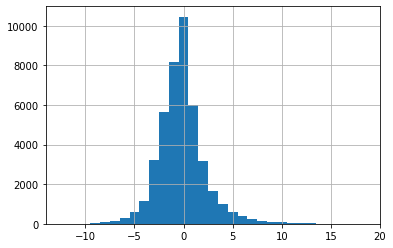

In [82]:
data['KLD Index'].hist(bins=31, align='left')

Check and fix division by zero in normalized index:

In [144]:
((data['positive']==0) & (data['negative']==0)).sum()

5327

In [128]:
((data['positive'] + data['negative']) ==0).sum()

5327

In [129]:
((data['positive'] - data['negative'])==0).sum()

10462

In [130]:
data['KLD Index Norm'].isna().sum()

0

In [132]:
data['KLD Index Norm'].fillna(0, inplace=True) # set division by 0 result NaN to zero

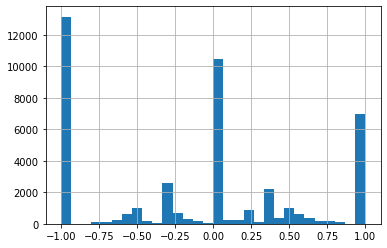

In [155]:
data['KLD Index Norm'].hist(bins=30, align='mid')

In [131]:
(data['KLD Index Norm']==0).sum()

10462

It can be skewed by the controversial issues. It does not preserve order of KLD Index. Say within +1, there are firms having zero negative with any positive values. This means they cannot be compared across within the same number.

In [138]:
(data['negative']==0).sum()

12275

In [145]:
((data['positive']!=0) & (data['negative']==0)).sum()

6948

In [140]:
12275 - 5327

6948

In [141]:
10462 - 5327

5135

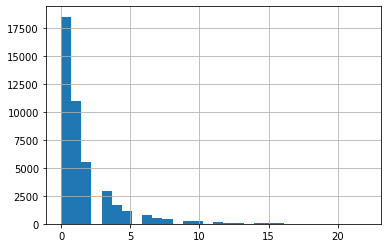

In [22]:
data['positive'].hist(bins=30)

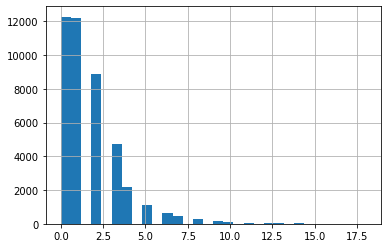

In [25]:
data['negative'].hist(bins=30)

In [26]:
KLD_summary = data['KLD Index'].describe()
KLD_summary['median'] = data['KLD Index'].median()
KLD_summary

count     43331.000000
mean         -0.183471
std           2.427169
min         -12.000000
25%          -2.000000
50%           0.000000
75%           1.000000
max          19.000000
median        0.000000
Name: KLD Index, dtype: float64

### 4.3 Collect ESG level positive and negative performance indicator list
Column names contains "str" ("con") corresponding to positive (negative) performance indicators, respectively.

#### 4.3.1 Environment Performance Indicators:

In [27]:
E_pos = data.columns[data.columns.str.contains("env_str") & ~data.columns.str.contains("env_str_num")]
data['E_pos'] = data[E_pos].sum(axis=1)
data['E_pos_avg'] = data[E_pos].mean(axis=1)

In [38]:
E_neg = data.columns[data.columns.str.contains("env_con") & ~data.columns.str.contains("env_con_num")]
data['E_neg'] = data[E_neg].sum(axis=1)
data['E_neg_avg'] = data[E_neg].mean(axis=1)

In [51]:
data['E Index'] = data['E_pos'] - data['E_neg']

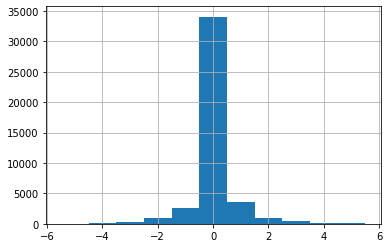

In [159]:
data['E Index'].hist(bins=11, align='left')

In [160]:
E_summary = data['E Index'].describe()
E_summary['median'] = data['E Index'].median()
E_summary

count     43331.000000
mean          0.042764
std           0.800844
min          -5.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
median        0.000000
Name: E Index, dtype: float64

#### 4.3.2 Social Performance Indicators:

In [165]:
S_pos = data.columns[data.columns.str.contains("com_str") & ~data.columns.str.contains("com_str_num") |
                     data.columns.str.contains("hum_str") & ~data.columns.str.contains("hum_str_num") |
                     data.columns.str.contains("emp_str") & ~data.columns.str.contains("emp_str_num") |
                     data.columns.str.contains("div_str") & ~data.columns.str.contains("div_str_num") |
                     data.columns.str.contains("pro_str") & ~data.columns.str.contains("pro_str_num")]
data['S_pos'] = data[S_pos].sum(axis=1)

S_neg = data.columns[data.columns.str.contains("com_con") & ~data.columns.str.contains("com_con_num") |
                     data.columns.str.contains("hum_con") & ~data.columns.str.contains("hum_con_num") |
                     data.columns.str.contains("emp_con") & ~data.columns.str.contains("emp_con_num") |
                     data.columns.str.contains("div_con") & ~data.columns.str.contains("div_con_num") |
                     data.columns.str.contains("pro_con") & ~data.columns.str.contains("pro_con_num")]
data['S_neg'] = data[S_neg].sum(axis=1)

data['S Index'] = data['S_pos'] - data['S_neg']

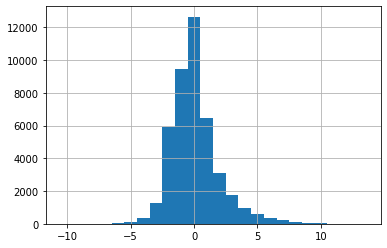

In [201]:
data['S Index'].hist(bins=24, align='left')

In [202]:
S_summary = data['S Index'].describe()
S_summary['median'] = data['S Index'].median()
S_summary

count     43331.000000
mean          0.062842
std           1.918233
min         -10.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max          14.000000
median        0.000000
Name: S Index, dtype: float64

#### 4.3.3 Governance Performance Indicators:

In [203]:
G_pos = data.columns[data.columns.str.contains("cgov_str") & ~data.columns.str.contains("cgov_str_num")]
data['G_pos'] = data[G_pos].sum(axis=1)

G_neg = data.columns[data.columns.str.contains("cgov_con") & ~data.columns.str.contains("cgov_con_num")]
data['G_neg'] = data[G_neg].sum(axis=1)

data['G Index'] = data['G_pos'] - data['G_neg']

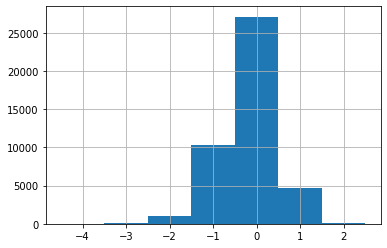

In [207]:
data['G Index'].hist(bins=7, align='left')

In [205]:
G_summary = data['G Index'].describe()
G_summary['median'] = data['G Index'].median()
G_summary

count     43331.000000
mean         -0.178394
std           0.662138
min          -4.000000
25%          -1.000000
50%           0.000000
75%           0.000000
max           3.000000
median        0.000000
Name: G Index, dtype: float64

#### 4.3.4 Controversial Business Involvement Indicators:
<div class="alert alert-block alert-warning">
<b>Warning:</b> "fir" has no "fir_con_num" so do NOT use "_num" columns to calculate aggregates.
</div>

In [210]:
Controv = data.columns[data.columns.str.contains("alc_") & ~data.columns.str.contains("alc_con_num") |
                       data.columns.str.contains("fir_") & ~data.columns.str.contains("fir_con_num") |
                       data.columns.str.contains("gam_") & ~data.columns.str.contains("gam_con_num") |
                       data.columns.str.contains("mil_") & ~data.columns.str.contains("mil_con_num") |
                       data.columns.str.contains("nuc_") & ~data.columns.str.contains("nuc_con_num") |
                       data.columns.str.contains("tob_") & ~data.columns.str.contains("tob_con_num")]
data['Controv'] = data[Controv].sum(axis=1)
data['Controv Index'] = - data['Controv']

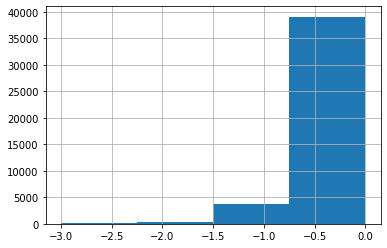

In [247]:
data['Controv Index'].hist(bins=4)

In [213]:
Controv_summary = data['Controv Index'].describe()
Controv_summary['median'] = data['Controv Index'].median()
Controv_summary

count     43331.000000
mean         -0.110683
std           0.354626
min          -3.000000
25%          -0.000000
50%          -0.000000
75%          -0.000000
max          -0.000000
median        0.000000
Name: Controv Index, dtype: float64

### 4.4 Construct Aggregate KLD Index from ESG & Controversial granular level

In [249]:
data['ESG_pos'] = data['E_pos'] + data['S_pos'] + data['G_pos']
data['ESG_neg'] = data['E_neg'] + data['S_neg'] + data['G_neg'] + data['Controv']
data['ESG Pos-Neg Index'] = data['ESG_pos'] - data['ESG_neg']
data['ESG Agg Index'] = data['E Index'] + data['S Index'] + data['G Index'] + data['Controv Index']

In [250]:
data['ESG Pos-Neg Index'].describe()

count    43331.000000
mean        -0.183471
std          2.427169
min        -12.000000
25%         -2.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: ESG Pos-Neg Index, dtype: float64

In [251]:
data['ESG Agg Index'].describe()

count    43331.000000
mean        -0.183471
std          2.427169
min        -12.000000
25%         -2.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: ESG Agg Index, dtype: float64

In [252]:
data['KLD Index'].describe()

count    43331.000000
mean        -0.183471
std          2.427169
min        -12.000000
25%         -2.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: KLD Index, dtype: float64

#### 4.4.1 Check that the aggregate results are the same using different methods above:

In [260]:
data['ESG Pos-Neg Index'].equals(data['ESG Agg Index'])

True

In [261]:
data['KLD Index'].equals(data['ESG Agg Index'])

True

In [263]:
data['ESG Pos-Neg Index'].describe().equals(data['ESG Agg Index'].describe())

True

In [264]:
data['KLD Index'].describe().equals(data['ESG Agg Index'].describe())

True

#### 4.4.2 Check that the positive and negative indicator lists are the same using different methods above:

In [265]:
set(positive) == set(E_pos.append(S_pos).append(G_pos))

True

In [266]:
set(negative) == set(E_neg.append(S_neg).append(G_neg).append(Controv))

True